# Keplarian Art
## Coding Intro
Before we delve into the guts of how planets move relative to each other, let's review some key details about the coding language Python, used in this notebook.  

- In notebooks (like this one), you can run a cell by clicking "***Shift+Enter***" at the same time.
- If you want to re-run a cell, click on the cell and then simply press "***Shift+Enter***" again. 
- After you have changed the sliders as you like, run the **NEXT** cell; this will update the values to your slider values!
- When you see a line of code with "#" followed by text, the text following the "#" will not be run, as it has been "commented out".
- When working with python notebooks, it is customary to import modules (code that other people have worked on that will make this code work) first!

In [2]:
#Originally from https://scipython.com/blog/the-earth-venus-dance/
#heavily modified and improved. 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets

## Being Kepler ##
So, before we get to the art, let's pretend to be in the 1600s in Prague.  You are Johannes Kepler, and you have a LOT of observational astronomy data on the motion of planets from your boss, Tycho Brahe.  The planets move in strange ways, and your job is to try to figure out how the planets actually move.  Good luck!

A note on how to read these plots: as time goes on, points get smaller, and the color goes from red to purple/pink. If the points are close together, the planet is moving fast, and if they are farther apart, then the planet is moving slow.   

First, let's see what affects the shape of an orbit: 
- mass of the planet
- eccentricity
- semi-major axis (usually measured in Astronomical Units, AU, which stands for the average distance between the Earth and the Sun)
- year length of a planet (period)

While you're playing with these sliders, work together with your classmates to try to answer the following questions:
- Which of these sliders affect the shape or size of the orbit?
- What does each slider actually do to change the plot?
- What is the relationship between speed and semi-major axis?
- What is the relationship betweeen period and speed?
- How does speed change over an orbit? How does this depend on eccentricity?
- What is the relationship between semi-major axis and period?  Period and mass?  Period and Eccentricity?  
- Summarize as best you can how planets move. 

In [3]:
def kepler_func(m, a, T, e, n, N):
    t = np.linspace(0, n, N)
    time_ang = t * 2*np.pi / T
    thetae = np.empty(N, dtype=float)
    for i in range(len(time_ang)):
        thetae[i] = KeplerEqSolver(time_ang[i], e)

    #Express the orbits as ellipses
    re_new = a*(1-e**2)/(1+e*np.cos(thetae))

    # Polar to Cartesian conversion centered on the foci (sun)
    xe, ye = re_new * np.cos(thetae), re_new * np.sin(thetae)

    jet= plt.get_cmap("gist_rainbow") 

    colors = iter(jet(np.linspace(0,1, len(thetae))))

    fig, ax = plt.subplots(figsize=(8,8))
    size_c = 200
    s_step = 175/N
    for i in range(len(thetae)):

        ax.scatter(xe[i], ye[i], zorder=1, color=next(colors), 
                   alpha=0.75, s=size_c)
        size_c = size_c - s_step
    ax.scatter(0,0, marker='*', color='xkcd:goldenrod', s=200, zorder=2)
    ax.patch.set_facecolor('black')
    ax.patch.set_edgecolor('black')

    ax.axis('equal')
    ax.axis('on')
    plt.tight_layout()
    plt.show()

In [4]:
def KeplerEqSolver(M, ecc):
    # solves Kepler's eqution
    # inputs:
    # - M, timelike variable, an angle in radians between [0,2pi]
    # - eccentricity ecc, between [0,1)
    # output:
    # - angular variable E = theta (1/time dependence)

    # set solver fraction accuracy
    # for a low-res plot this does not need to be very small
    eps = 0.001

    M_eff = M
    if (M_eff > 2.* np.pi):
        M_eff = np.fmod(M, 2.*np.pi)

    # intitial guess for E
    if (ecc > 0.6):
        E_init = np.pi
    else:
        E_init = M

    # initialize

    E = E_init

    # iterate using Newton's method
    it = 0
    while (np.abs(M - E + ecc * np.sin(E)) > eps):
        E = E + (M - E + ecc * np.sin(E))/(1.-ecc*np.cos(E))
        #print (E, M - E + ecc * np.sin(E))
        it+=1
        
    return E


In [5]:
## this gives an array values for the time-like variable M
## spanning one complete period
N_vals = 21
M_vals = np.linspace(0., 1.0, N_vals) * 2. * np.pi
e = 0.3

## loop through values and print out
for j in range(M_vals.size):
    M = M_vals[j]
    E_solve = KeplerEqSolver(M, e)
    df = M-(E_solve - e * np.sin(E_solve))
    r_a = (1.-e**2)/(1.+e*np.cos(E_solve))
    t_P = M/(2.*np.pi)
    #print ("for M=%.3f and e=%.3f:  E = %.3f; df = %.2e; (t/P,r/a) = (%.3f, %.3f)" % (M, e, E_solve, df, t_P, r_a))


In [6]:
def k(mass=1):
    return mass 

planets = interactive(k, mass=(0.1, 1000, 0.01)); 
display(planets)

n = 1
N = 100

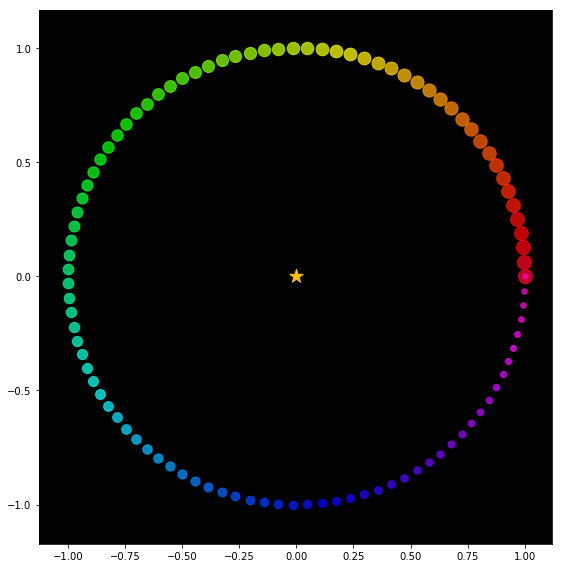

In [7]:
m = planets.result
a = 1
T = 1
e = 0

# Mass Trial
kepler_func(m, a, T, e, n, N)

In [8]:
def k(semi_major_axis=1):
    return semi_major_axis 

planets = interactive(k, semi_major_axis=(0.1,20, 0.01)); 
                      
display(planets)

N = 100

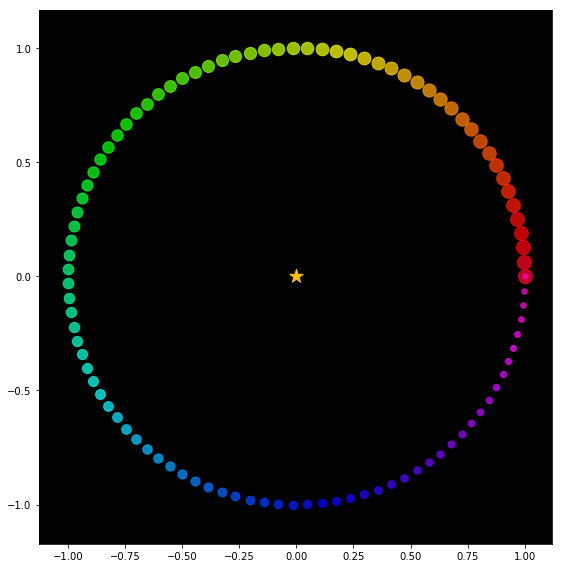

In [9]:
m = 1
a = planets.result
T = a**(3/2)
e = 0

# Semi-major axis Trial
kepler_func(m, a, T, e, T, N)

In [10]:
def k(period=1):
    return  period

planets = interactive(k, period=(0.1,20,0.01));
display(planets)

N = 100

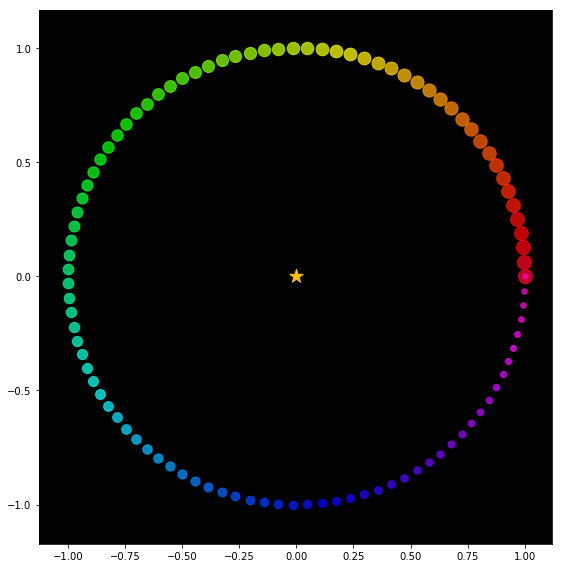

In [11]:
m = 1
T = planets.result
a = T**(2/3)
e = 0

# Period Trial
kepler_func(m, a, T, e, T, N)

In [12]:
e_slide = widgets.FloatSlider(value=0.01671, min=0, max=0.980, 
                    step=0.0001, readout_format='.4f', description='eccentricity')
display(e_slide)

n = 1
N = 100

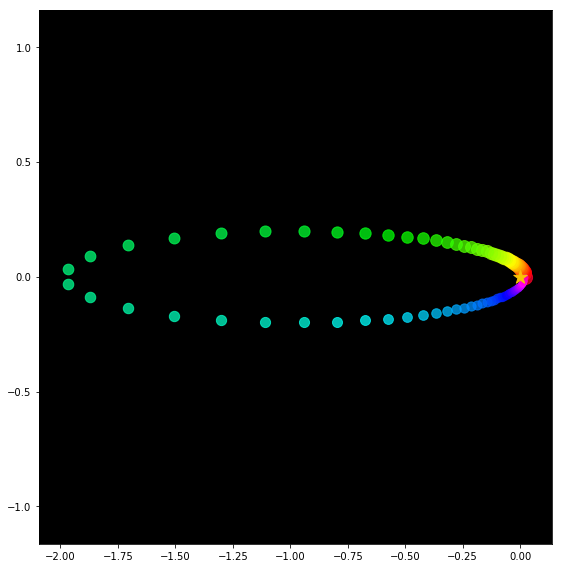

In [13]:
m = 1
T = 1
a = 1
e = e_slide.value

# Eccentricity Trial
kepler_func(m, a, T, e, n, N)

## Two Planet Systems ##
Now that we have a handle on a one planet system, what about a two planet system?  

These plots are like the previous, but the colormap is slightly different: as time goes on, the points get smaller and go from blue to red.

Play with the sliders below and try to answer the following questions:
- What pairs of eccentricities/semimajor axes would you need to cause a collision (have the two orbits overlap)?
- What happens when semi_major_axis1 = 2*semi_major_axis2?
- If one planet is at earth's orbit (semi_major_axis1=1, eccentricity1=0), and how far away should the second planet (semi_major_axis2=?, eccentricity2=0) be to complete one orbit while earth completes two orbits (n=2)?
- What about for three orbits of earth (n=3) for one orbit of further planet?


In [14]:
def kepler_2planet(a1, a2, T1, T2, e1, e2, n, N):
    t = np.linspace(0, n, N)
    time_ang1 = t * 2*np.pi / T1
    time_ang2 = t * 2*np.pi / T2
    
    theta1 = np.empty(N, dtype=float)
    theta2 = np.empty(N, dtype=float)
    for i in range(len(time_ang1)):
        theta1[i] = KeplerEqSolver(time_ang1[i], e1)
        theta2[i] = KeplerEqSolver(time_ang2[i], e2)

    #Express the orbits as ellipses
    a1_new = a1*(1-e1**2)/(1+e1*np.cos(theta1))
    a2_new = a2*(1-e2**2)/(1+e2*np.cos(theta2))

    # Polar to Cartesian conversion centered on the foci (sun)
    x1, y1 = a1_new * np.cos(theta1), a1_new * np.sin(theta1)
    x2, y2 = a2_new * np.cos(theta2), a2_new * np.sin(theta2)

    jet1= plt.get_cmap("jet") 
    colors1 = iter(jet1(np.linspace(0,1, len(theta1))))

    jet2 = plt.get_cmap("jet")
    colors2 = iter(jet2(np.linspace(0,1, len(theta1))))

    fig, ax = plt.subplots(figsize=(13,13))
    size_c = 300
    s_step = 280/N
    for i in range(len(theta1)):
        ax.scatter(x1[i], y1[i], zorder=1, color=next(colors1), 
                   alpha=1, s=size_c)
        ax.scatter(x2[i], y2[i], zorder=1, color=next(colors2), 
                   alpha=1, s=size_c)
        size_c = size_c - s_step

    ax.scatter(0,0, marker='*', color='xkcd:goldenrod', s=200, zorder=2)
    ax.patch.set_facecolor('black')
    ax.patch.set_edgecolor('black')

    ax.axis('equal')
    ax.axis('on')
    plt.tight_layout()
    plt.show()

In [15]:
def h(semi_major_axis1=1, semi_major_axis2=0.723):
    return semi_major_axis1, semi_major_axis2
planets = interactive(h, semi_major_axis1=(0.1,100, 0.01), 
                      semi_major_axis2=(0.1,100,0.01));
display(planets)
ee_slide = widgets.FloatSlider(value=0.01671, min=0, max=0.980, 
                    step=0.0001, readout_format='.4f', 
                               description='eccentricity1')
display(ee_slide)

ev_slide = widgets.FloatSlider(value=0.0067, min=0, max=0.980, 
                    step=0.0001, readout_format='.4f', 
                               description='eccentricity2')
display(ev_slide)

n_years = widgets.FloatSlider(value=1, min=0.5, max=5, 
                    step=0.1, readout_format='.1f',
                              description='Number of years')
display(n_years)

N = 200

semi-major axis(AU), period(years)
1 : 1.0 1.0
2 : 0.723 0.6147626102813996


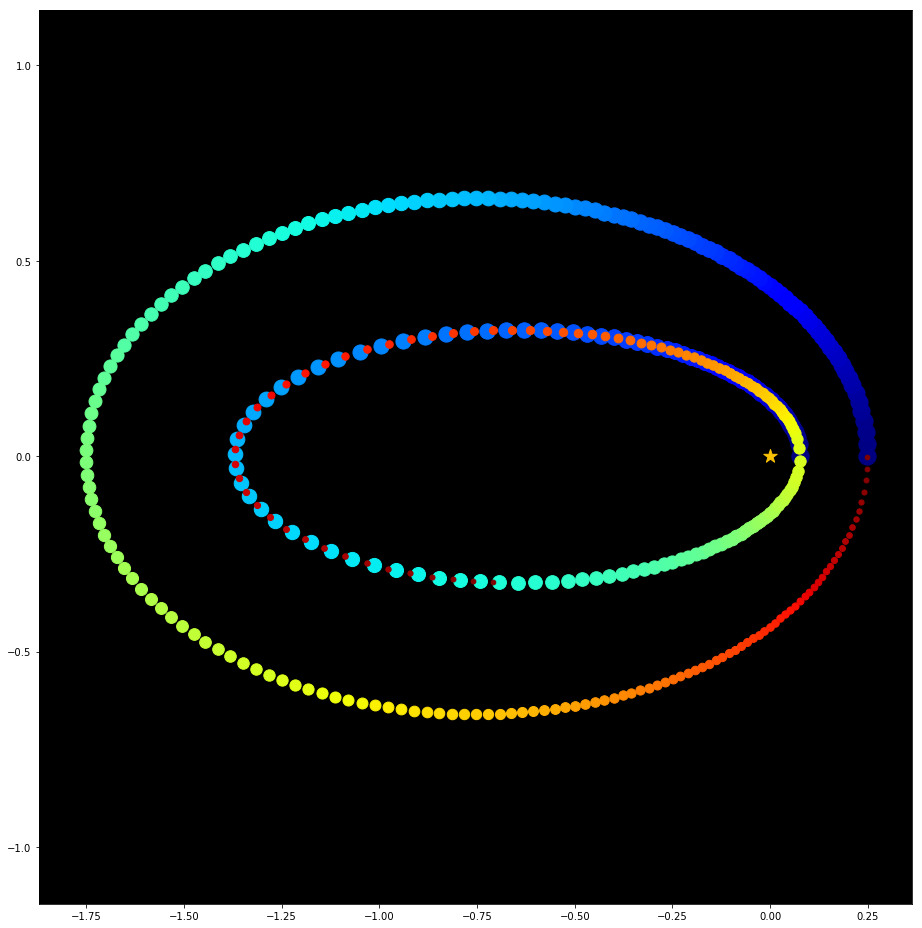

In [16]:
a1, a2 = planets.result

T1 = (a1**(3/2))
T2 = (a2**(3/2))
print("semi-major axis(AU), period(years)")
print("1 :", a1, T1)
print("2 :", a2, T2)
e1 = ee_slide.value
e2 = ev_slide.value
n = n_years.value

kepler_2planet(a1, a2, T1, T2, e1, e2, n, N)

## Earth-Venus Dance ##
Now that we have an idea about how planets move by themselves, let's see how the distance between two planets over a given time can create a pattern!  

This is partially due to **orbital resonances**, meaning that the object's periods are related by a ratio of small integers.  Orbital resonances can be thought of as like pushing a child on a swing; if a planet pulls at the right time, the other planet will be pulled even harder, modifying the orbits, making them stronger. Eventually, this will create instability, which will shift the orbits until the planets are no longer in resonance. However, some systems are stable!

In [17]:
def earth_venus_dance(Te, Tv, re, rv, ee, ev, rot_e, rot_v, n, N):
    t = np.linspace(0, n*365, N)
    
    time_ang1 = t * 2*np.pi / Te
    time_ang2 = t * 2*np.pi / Tv
    
    thetae = np.empty(N, dtype=float)
    thetav = np.empty(N, dtype=float)
    for i in range(len(time_ang1)):
        thetae[i] = KeplerEqSolver(time_ang1[i], ee)
        thetav[i] = KeplerEqSolver(time_ang2[i], ev) 

    #Express the orbits as ellipses
    re_new = re*(1-ee**2)/(1+ee*np.cos(thetae))
    rv_new = rv*(1-ev**2)/(1+ev*np.cos(thetav))

    # Polar to Cartesian conversion centered on the foci (sun)
    xe, ye = re_new * np.cos(thetae), re_new * np.sin(thetae)
    xv, yv = rv_new * np.cos(thetav), rv_new * np.sin(thetav)

    #rotation of Ellipse
    xe_rot = xe*np.cos(rot_e) + ye*np.sin(rot_e)
    ye_rot = ye*np.cos(rot_e) - xe*np.sin(rot_e)

    xv_rot = xv*np.cos(rot_v) + yv*np.sin(rot_v)
    yv_rot = yv*np.cos((rot_v)) - xv*np.sin((rot_v))

    jet= plt.get_cmap("viridis_r") 

    colors = iter(jet(np.linspace(0,1, len(thetae))))

    fig, ax = plt.subplots(figsize=(13,13))

    for i in range(len(thetae)):
        ax.plot([xe_rot[i], xv_rot[i]], [ye_rot[i], yv_rot[i]], zorder=1, color=next(colors), alpha=0.75)
    ax.scatter(0,0, marker='*', color='xkcd:goldenrod', s=200, zorder=2)
    ax.patch.set_facecolor('black')
    ax.patch.set_edgecolor('black')

    ax.axis('equal')
    ax.axis('on')
    plt.tight_layout()
    plt.savefig("venus_earth_dance.png", dpi=500, facecolor='black')
    plt.show()

In [18]:
def h(semi_major_axis_1=1, semi_major_axis_2=0.723):
    return semi_major_axis_1, semi_major_axis_2
planets = interactive(h, semi_major_axis_1=(0.1,100, 0.01), 
                      semi_major_axis_2=(0.1,100,0.01));
display(planets)
ee_slide = widgets.FloatSlider(value=0.01671, min=0, max=1.0, 
                    step=0.0001, readout_format='.4f', 
                               description='eccentricity_1')
display(ee_slide)

ev_slide = widgets.FloatSlider(value=0.0067, min=0, max=1.0, 
                    step=0.0001, readout_format='.4f', 
                               description='eccentricity_2')
display(ev_slide)
rote_slide = widgets.FloatSlider(value=0.0, min=0, max=2*np.pi, 
                    step=0.01, readout_format='.2f', 
                                 description='ellipse_rotation_1')
display(rote_slide)

rotv_slide = widgets.FloatSlider(value=np.pi/4, min=0, max=2*np.pi, 
                    step=0.01, readout_format='.2f', 
                                 description='ellipse_rotation_2')
display(rotv_slide)

n_years = widgets.FloatSlider(value=9, min=0.5, max=200, 
                    step=0.1, readout_format='.1f', 
                              description='Number of years')
display(n_years)

N_points = widgets.FloatSlider(value=600, min=400, max=800, 
                    step=10, description='Number of points')
display(N_points)

### Info ###
If you run this notebook as-is, you will run the venus-earth setup.  Below are some other semimajor axes and eccentricities to try out, or invent your own planets!

| Planet | semi-major axis | eccentricity |
|--------|---|---|
|Mercury | 0.3871 | 0.206 |
|  Venus      |  0.7233 | 0.007  |
|   Earth     | 1  |  0.017 |
|   Mars     | 1.5273  | 0.093  |
| Jupiter | 5.2028  | 0.048 |
| Saturn | 9.5388   | 0.056 |
| Uranus | 19.1914  | 0.046 |
| Neptune | 30.0611 | 0.010 |

| Dwarf Planet | semi-major axis | eccentricity |
| -------------|---|---|
|Ceres| 2.76596 | 0.07976|
|Pluto| 39.5294 | 0.248 |
|Haumea | 43.335 |0.18874 |
|Makemake| 45.791 | 0.159 |
|Eris | 67.6681 | 0.44177 |


Semi-major axis(AU), period(days)
Planet 1 : 44.68 109009.06412717796
Planet 2 : 43.36 104214.17018134145
Rotation angles (radians; e, v) : 0.0 0.7853981633974483


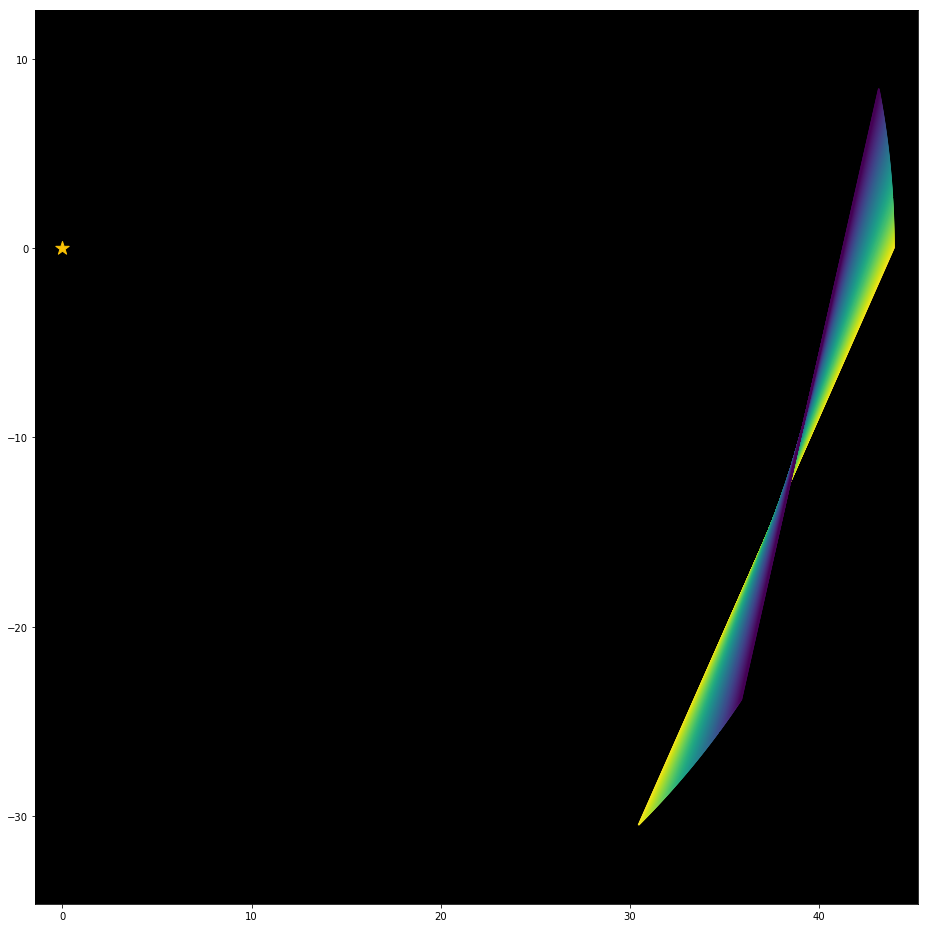

In [19]:
re, rv = planets.result

#Find the period with Kepler's third law!
Te = (re**(3/2))*365
Tv = (rv**(3/2))*365

print("Semi-major axis(AU), period(days)")
print("Planet 1 :", re, Te)
print("Planet 2 :", rv, Tv)
ee = ee_slide.value
ev = ev_slide.value

#argument of periapsis
rot_e = rote_slide.value
rot_v = rotv_slide.value
print("Rotation angles (radians; e, v) :", rot_e, rot_v)

# number of years of plotting
n = n_years.value

# total number of positions to sample.
N = int(N_points.value)

earth_venus_dance(Te, Tv, re, rv, ee, ev, rot_e, rot_v, n, N)